In [2]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# Load your SMOTE-resampled dataset
df = pd.read_csv('resampled.csv')

# Separate features and target
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [4]:
model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
model.fit(X_train, y_train)

c:\Users\NikitaRampurkarV-Sof\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:00:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [5]:
y_pred = model.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predictions on training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# --- Training Metrics ---
print("🔹 Training Metrics")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("F1 Score:", f1_score(y_train, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))

# --- Testing Metrics ---
print("\n🔹 Testing Metrics")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

🔹 Training Metrics
Accuracy: 0.98957065878672
Precision: 0.9989373007438895
Recall: 0.9801876955161627
F1 Score: 0.9894736842105263

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2876
           1       1.00      0.98      0.99      2877

    accuracy                           0.99      5753
   macro avg       0.99      0.99      0.99      5753
weighted avg       0.99      0.99      0.99      5753


🔹 Testing Metrics
Accuracy: 0.8797776233495483
Precision: 0.9038461538461539
Recall: 0.8497913769123783
F1 Score: 0.8759856630824373

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88       720
           1       0.90      0.85      0.88       719

    accuracy                           0.88      1439
   macro avg       0.88      0.88      0.88      1439
weighted avg       0.88      0.88      0.88      1439



In [7]:
conf_matrix = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = conf_matrix.ravel()

# Print results
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
total = TP+TN+FP+FN

accuracy = (TP+TN)/total
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2*(precision * recall)/(precision + recall)
print(accuracy)
print(precision)
print(recall)
print(f1_score)

True Positives (TP): 611
True Negatives (TN): 655
False Positives (FP): 65
False Negatives (FN): 108
0.8797776233495483
0.9038461538461539
0.8497913769123783
0.8759856630824373


In [9]:
import joblib
joblib.dump(model, 'xgboost_model.pkl')

['xgboost_model.pkl']

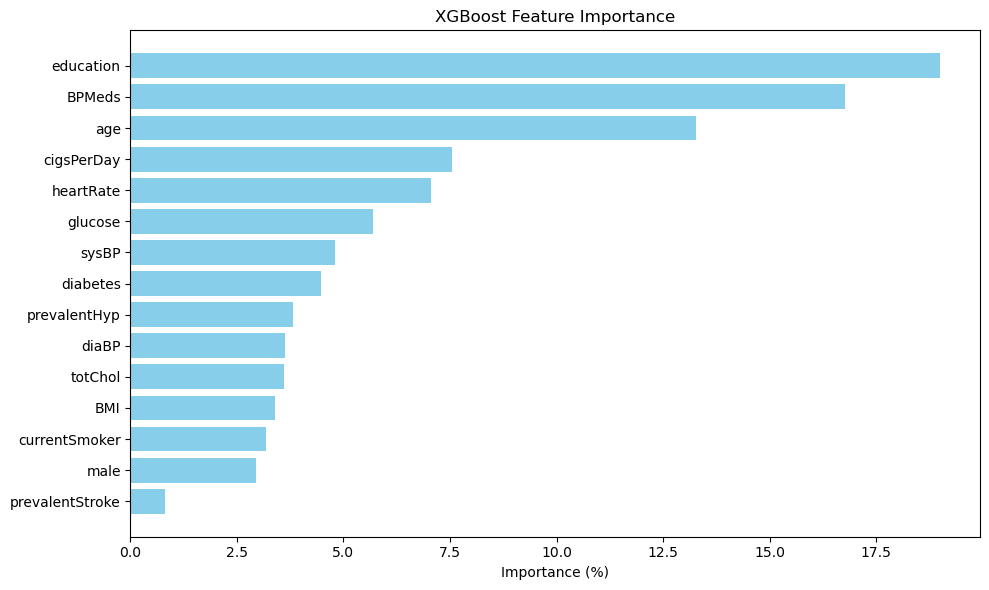

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature importances from the model
importances = model.feature_importances_

# Convert to percentages
importances_percent = 100.0 * (importances / importances.sum())

# Create a DataFrame for better handling
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance (%)': importances_percent
}).sort_values(by='Importance (%)', ascending=False)

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance (%)'], color='skyblue')
plt.xlabel('Importance (%)')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()  # Most important on top
plt.tight_layout()
plt.show()
